    Problem: 
	Where is the best location to open a new liquor store in Iowa? What other factors will influence an Iowan liquor store’s success?

    Goals: 
	Model expected sales for each location.
	Make recommendations based on the model
	
    Criteria for Success:
	Create models that accurately describe the data we have
	Make inferences as to how the store owner can boost sales

    The Data:
	The dataset I worked with was a list of all liquor sales in Iowa to retailers in between (and including) 1/5/2015 and 3/31/2016 . The data was provided by Iowa’s Alcoholic Beverages Division which regulates all liquor sales in the state.

    Process:
	I used Python to describe the data, identify problems with the data, and then fix those problems where I was able to deduce the correct values. In particular, sales made in zip code ‘51529’ were incorrectly entered as ‘712-2’ which is actually the area code. Also, many of the entries had the zip code recorded as ‘56201’ which is actually a zip code in Minnesota. These entries all were recorded as being in Burlington, IA, which has zip code 52601. Therefore I deduced that this was merely a data entry error, and I corrected it. Other than that, the only anomalies I found in the data were some missing entries in the County column, which I opted not to use in my model.
	After cleaning the data, I then made two separate dataframes to store aggregate statistics on the original dataset. In the first dataframe, I stored statistics on each zip code such as the mean and median sales per store, total liquor sales, and the number of liquor stores. The second dataframe contains information on each individual store including total sales, location, and their best selling items. This allowed for much easier interpretability of the data than the original format.
	Using the two new dataframes that I created, I built a model to predict total sales for stores in each zip code. I also built a model to infer the effects of other factors on the total sales for liquor stores.

    Findings:
    Top 5 Zip Codes in terms of Median Sales
    Zip Code   Median Sales  Stores Nearby  City          County      Total Sales 
    52411      1,024,513.33  1              Cedar Rapids  Linn        1,024,513.33
    51351      645,340.00    2              Milford       Dickinson   1,290,679.99
    52087      478,291.67    1              Manchester    Delaware    478,291.67
    50428      431,777.01    4              Clear Lake    Cerro Gordo 1,670,837.95
    50327      386,819.64    1              Pleasant Hill Polk        386,819.64



    Stores in Those Zip Codes:
    52411:
    Store Number   Total Sales         Best Seller
    
    2647           1,024,513.33        Pinnacle Vodka
    -----------------------------------------------------------
    51351:
    Store Number   Total Sales         Best Seller
    
    3390           1,278,226.39        Barton Vodka
    4499           12,453.60           Black Velvet
    -----------------------------------------------------------
    52087:
    5054           478,291.67          Black Velvet
    -----------------------------------------------------------
    50428:
    4969           664,658.09          Montezuma White Tequila
    3456           633,364.87          Hawkeye Vodka
    4091           230,189.14          Black Velvet
    4668           142,625.85          Hawkeye Vodka
    -----------------------------------------------------------
    50327:
    4971           386,819.64          Black Velvet


    Top Performing Stores Statewide:
    Store Number  Zip Code  Total Sales    Best Seller           Variety
    2633          50320     9,839,393.08   Juarez Tequila Gold   1000
    4829          50314     8,742,779.31   Barton Vodka          859
    2512          52240     4,155,665.47   Barton Vodka          1239
    3385          52402     3,947,176.01   Barton Vodka          333
    3420          50311     3,422,351.55   Barton Vodka          209

    Zip Codes with Highest Total Sales:
    Zip Code    Total Sales     Median Sales    # of Liquor Stores
    50314       10,657,730.00   303,064.48      6
    50320       10,500,740.00   72,311.77       9
    52402       9,202,527.00    83,003.60       28
    52240       8,946,889.00    87,918.83       20
    50010       7,334,014.00    82,226.48       21
    
    Other factors besides location that highly affect the success of a store are how much variety it offers, the average price per bottle, and average bottle size. More variety and a higher average price per bottle are correlated with an increase sales, while higher average bottle size is correlated with decrease in total sales. These factors are only a small piece of the big picture, so they aren’t incredibly useful for prediction on their own. However, they are still very statistically significant, so we can make some inferences about a store’s success based on these parameters.

    Conclusions:
	Zip code 52411, in Cedar Rapids, Linn County has the highest median sales of any zip code by a huge margin. This is due to there being only one liquor store in the entire zip code, which manages to capture all of a $1,024,513 market. Out of zip codes with only one liquor store, the one with the next highest sales is 52087, with total liquor sales of $478,291.67. 
	The zip codes with the highest total sales are not the locations where stores are most likely to succeed. In those areas, there is generally a large amount of competition and many stores that sell very little. 52411 is a sweet spot where there is still a relatively large market for liquor, and almost no competition. I would highly recommend this location for your store.
	In general, you would want to stock your liquor store with a large variety of types of liquors. Also, make sure that you stock small bottles as well as large. Finally, I would recommend that you include some expensive bottles of liquor in your stock.


# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
pd.options.display.max_rows = 10
path='../../datasets/Iowa_Liquor_Sales_reduced.csv'
## Load the data into a DataFrame
# pd.read_csv()
df=pd.read_csv(path)
#Drop columns I wont be working with
df=df.drop(['Volume Sold (Gallons)', 'Item Number', 'Category'], axis=1)
df.head(3)
## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

/home/rb/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Store Number,City,Zip Code,County Number,County,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,TEQUILA,370,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,TEQUILA,395,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,AMERICAN COCKTAILS,380,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Sale (Dollars)']=df['Sale (Dollars)'].str[1:]
df['Sale (Dollars)']=df['Sale (Dollars)'].astype(float)
df['State Bottle Cost']=df['State Bottle Cost'].str[1:]
df['State Bottle Cost']=df['State Bottle Cost'].astype(float)
df['State Bottle Retail']=df['State Bottle Retail'].str[1:]
df['State Bottle Retail']=df['State Bottle Retail'].astype(float)
#Convert Date to Datetime
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)
print df['Date'].max()
df=df[df['Date'].dt.year==2015]

2016-03-31 00:00:00


In [3]:
# These zip codes were entered incorrectly
#df[df['Zip Code'].str.isdigit()==False]
df['Zip Code'].replace('712-2', '51529', inplace=True)
df['Zip Code']=df['Zip Code'].astype(int)
#Convert zip to ints for easier processing, must be categorized for analysis
#Zip code 56201 is in Minnesota, the zip for Burlington IA should be 52601
df['Zip Code']=df['Zip Code'].replace(56201, 52601)

In [4]:
df.describe()

,Store Number,Zip Code,County Number,Vendor Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
count,2.184483e+06,2.184483e+06,2.183364e+06,2.184483e+06,2.184483e+06,2.184483e+06,2.184483e+06,2.184483e+06,2.184483e+06,2.184483e+06
mean,3.578517e+03,5.126350e+04,5.719683e+01,2.559387e+02,9.248151e+02,9.816489e+00,1.474239e+01,9.875308e+00,1.301583e+02,8.980478e+00
std,9.435823e+02,9.871962e+02,2.729248e+01,1.409934e+02,5.211457e+02,1.462323e+01,2.193459e+01,2.369368e+01,4.054722e+02,2.834942e+01
min,2.106000e+03,5.000200e+04,1.000000e+00,1.000000e+01,0.000000e+00,8.900000e-01,1.340000e+00,1.000000e+00,1.340000e+00,0.000000e+00
25%,2.603000e+03,5.031500e+04,3.100000e+01,1.150000e+02,7.500000e+02,5.540000e+00,8.310000e+00,2.000000e+00,3.072000e+01,1.500000e+00
50%,3.713000e+03,5.110100e+04,6.200000e+01,2.600000e+02,7.500000e+02,8.180000e+00,1.230000e+01,6.000000e+00,7.056000e+01,5.250000e+00
75%,4.357000e+03,5.231000e+04,7.700000e+01,3.800000e+02,1.000000e+03,1.196000e+01,1.794000e+01,1.200000e+01,1.353600e+02,1.050000e+01
max,9.023000e+03,5.280700e+04,9.900000e+01,9.780000e+02,1.800000e+05,6.100000e+03,9.150000e+03,3.960000e+03,1.063260e+05,3.960000e+03


# Record your findings

Be sure to write out anything observations from your exploratory analysis.


Dates include all of 2015 and first 3 months of 2016
One zip code was recorded incorrectly as '712-2' which is the area code
zip code 52601 recorded as 56201
small number of stores have a huge portion of the sales
most sales on Monday, decreasing towards Saturday. Very few sales on Fri and Sat, none on Sun
Huge spike in sales in the month of December, also spikes in October and June

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


In [5]:
#Checks if zip codes are consistent across all entries for each store
c=True
for _ in df.groupby('Store Number')['Zip Code'].unique().values:
    if len(_)!=1:
        c=False
assert c

In [6]:
import numpy as np
total_sales=df['Sale (Dollars)'].sum()
store_series=df.groupby('Store Number')['Sale (Dollars)'].sum().sort_values(ascending=False)
store_sales=pd.DataFrame(store_series.values, index=store_series.index, columns=['Total Sales'])
#Create new dataframe for aggregate data on a store-by-store basis
store_sales['% of Total']=store_sales['Total Sales']/total_sales*100
store_sales.reset_index(inplace=True)
#Function definitions to apply on columns
def store_zip(store_number):
    return df[df['Store Number']==store_number].iloc[0]['Zip Code']
def store_bottles(store_number):
    return df[df['Store Number']==store_number]['Bottles Sold'].values.sum()
def store_variety(store_number):
    return len(df[df['Store Number']==store_number]['Item Description'].unique())
def bottle_size(store_number):
    return np.average(df[df['Store Number']==store_number]['Bottle Volume (ml)'], weights=df[df['Store Number']==store_number]['Bottles Sold'])
def store_bestseller(store_number):
    return df[df['Store Number']==store_number].groupby('Item Description')['Bottles Sold'].sum().sort_values(ascending=False).index[0]
def ppbottle(store_number):
    return np.average(df[df['Store Number']==store_number]['State Bottle Retail'], weights=df[df['Store Number']==store_number]['Bottles Sold'])
def which_city(store_number):
    return df[df['Store Number']==store_number].iloc[0]['City']
#Creating new columns
store_sales['Zip']=store_sales['Store Number'].apply(store_zip)
store_sales['Bottles Sold']=store_sales['Store Number'].apply(store_bottles)
store_sales['Variety']=store_sales['Store Number'].apply(store_variety) #Unique items being sold by the store
store_sales['Avg Bottle Size']=store_sales['Store Number'].apply(bottle_size) #weighted avg of bottle size bought by 1 store
store_sales['Best Seller']=store_sales['Store Number'].apply(store_bestseller)
store_sales['Avg Ppbottle']=store_sales['Store Number'].apply(ppbottle)
store_sales['City']=store_sales['Store Number'].apply(which_city)

In [7]:
#Aggregate data on a zip-by-zip basis
zip_series=df.groupby('Zip Code')['Sale (Dollars)'].sum().sort_values(ascending=False)
zip_sales=pd.DataFrame(zip_series.values, index=zip_series.index, columns=['Total Sales'])
zip_sales.reset_index(inplace=True)
# Function Defs
def zip_avgsales(zcode):
    return store_sales[store_sales['Zip']==zcode]['Total Sales'].values.mean()
def median_nearby(zcode):
    return df[df['Zip Code']==zcode].groupby('Store Number')['Sale (Dollars)'].sum().median()
def in_zip(zcode):
    return len(store_sales[store_sales['Zip']==zcode])
def total_sold_nearby(zcode):
    return df[df['Zip Code']==zcode]['Sale (Dollars)'].sum()
def avg_ppbottle(zcode):
    return np.average(df[df['Zip Code']==zcode]['State Bottle Retail'], weights=df[df['Zip Code']==zcode]['Bottles Sold'])
def total_bottles(zcode):
    return df[df['Zip Code']==zcode]['Bottles Sold'].sum()
zip_sales
#Create columns
zip_sales['Median Sales Nearby']=zip_sales['Zip Code'].apply(median_nearby)
zip_sales['Total Sales Nearby']=zip_sales['Zip Code'].apply(total_sold_nearby)
zip_sales['Avg Sales Nearby']=zip_sales['Zip Code'].apply(zip_avgsales)
zip_sales['# Stores Nearby']=zip_sales['Zip Code'].apply(in_zip) 
zip_sales['Avg Price Per Bottle']=zip_sales['Zip Code'].apply(avg_ppbottle)
zip_sales['# Bottles Sold']=zip_sales['Zip Code'].apply(total_bottles)

# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

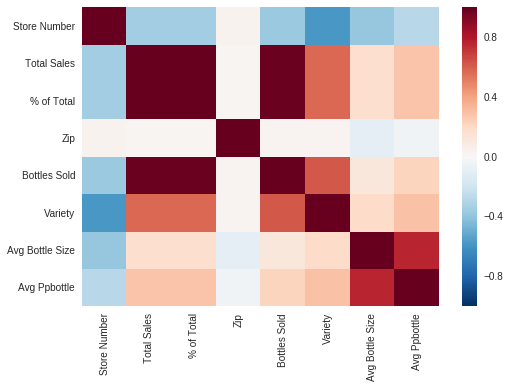

In [8]:
corr=store_sales.corr()
sns.heatmap(corr)
plt.show()

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [9]:
store_dummies=pd.concat([store_sales, pd.get_dummies(store_sales['Zip'])], axis=1)
store_dummies.columns
dummy_cols=list(store_dummies.columns.values)
base_zip=50314
del dummy_cols[dummy_cols.index(base_zip)]
zips_list=dummy_cols[10:]
predictors=['Bottles Sold', 'Avg Ppbottle']

In [10]:
from sklearn.model_selection import train_test_split
y=store_dummies['Total Sales'] #The variable we want to predict
X=store_dummies[predictors]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)

In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets, linear_model

lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv=5)
print "Cross-validated scores:", scores
print "Average: ", scores.mean()

Cross-validated scores: [ 0.97476376  0.95064705  0.9896739   0.98702407  0.95934634]
Average:  0.972291023513


In [12]:
predictors_sm=predictors+zips_list
y=store_dummies['Total Sales'] #The variable we want to predict
X=store_dummies[predictors_sm]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)
model_sm = sm.OLS(y_train, X_train_sm, missing='drop').fit() ## sm.OLS(output, input)
predictions_sm = model_sm.predict(X_test_sm)

/home/rb/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
accuracy = metrics.r2_score(y_test, predictions_sm)
print accuracy

0.981547117348


In [14]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     116.0
Date:                Wed, 13 Sep 2017   Prob (F-statistic):               0.00
Time:                        16:09:24   Log-Likelihood:                -15538.
No. Observations:                1237   AIC:                         3.186e+04
Df Residuals:                     845   BIC:                         3.387e+04
Df Model:                         391                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.048e+05   3.61e+04     -5.675      0.000   -2.76e+05   -1.34e+05
Bottles Sold    15.6775      0.086    182.789      0.000      15.509      15.846
Avg Ppbottle  1.119e+04    916.075     12.218      0.000    9394.211     1.3e+04
50002         9.588e+04   9.07e+04      1.057      0.291   -8.21e+04    2.74e+05
50003         5.476e+04   5.98e+04      0.916      0.360   -6.26e+04    1.72e+05
50006         5.619e+04    6.9e+04      0.814      0.416   -7.92e+04    1.92e+05
50009         1035.1712   4.61e+04      0.022      0.982   -8.94e+04    9.14e+04
50010         2.887e+04   3.96e+04      0.729      0.466   -4.89e+04    1.07e+05
50014         3.326e+04   5.49e+04      0.606      0.545   -7.45e+04    1.41e+05
50020         8.816e+04   9.07e+04      0.972      0.331   -8.99e+04    2.66e+05
50021         5.171e+04   4.34e+04      1.192      0.233   -3.34e+04    1.37e+05
50022         4.601e+04   4.92e+04      0.935      0.350   -5.05e+04    1.43e+05
50023         5.584e+04   4.61e+04      1.211      0.226   -3.46e+04    1.46e+05
50025         5.083e+04   6.89e+04      0.738      0.461   -8.44e+04    1.86e+05
50028         6.505e+04    6.9e+04      0.943      0.346   -7.03e+04       2e+05
50033         6.454e+04   9.07e+04      0.711      0.477   -1.14e+05    2.43e+05
50035         3.028e+04   9.06e+04      0.334      0.738   -1.48e+05    2.08e+05
50036         5.543e+04   4.61e+04      1.203      0.229    -3.5e+04    1.46e+05
50044         1.146e+05   9.07e+04      1.264      0.207   -6.34e+04    2.93e+05
50046         6.719e+04   9.08e+04      0.740      0.459   -1.11e+05    2.45e+05
50047         6.364e+04   6.88e+04      0.924      0.356   -7.15e+04    1.99e+05
50048         6.995e+04   9.07e+04      0.771      0.441   -1.08e+05    2.48e+05
50049         1.848e+04   6.89e+04      0.268      0.789   -1.17e+05    1.54e+05
50054         6.315e+04   9.07e+04      0.696      0.486   -1.15e+05    2.41e+05
50056         6.946e+04   9.07e+04      0.766      0.444   -1.09e+05    2.47e+05
50058         5.478e+04   9.07e+04      0.604      0.546   -1.23e+05    2.33e+05
50060          3.86e+04   9.08e+04      0.425      0.671    -1.4e+05    2.17e+05
50061         7.498e+04   9.07e+04      0.827      0.409   -1.03e+05    2.53e+05
50069          5.62e+04   9.07e+04      0.620      0.536   -1.22e+05    2.34e+05
50071         7.723e+04   9.07e+04      0.851      0.395   -1.01e+05    2.55e+05
50072        -3.237e-07   2.12e-06     -0.153      0.879   -4.48e-06    3.84e-06
50075         5.319e+04   9.08e+04      0.586      0.558   -1.25e+05    2.31e+05
50076          6.94e+04   9.07e+04      0.765      0.444   -1.09e+05    2.47e+05
50107          8.13e+04   9.07e+04      0.896      0.370   -9.67e+04    2.59e+05
50109        -2.188e-06   1.43e-05     -0.153      0.879   -3.03e-05    2.59e-05
50111

In [15]:
model_sm.params.sort_values(ascending=False)

52401    172887.125504
52639    157532.681632
50044    114649.055488
50266    109900.917127
51038    104885.885633
             ...      
52245    -63871.297343
52803    -82525.045613
50310   -164640.077341
const   -204787.202357
52084   -214649.528069
Length: 411, dtype: float64

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

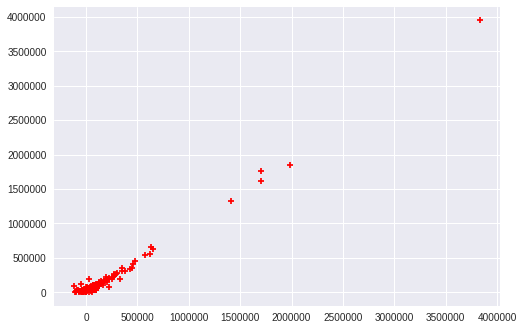

In [16]:
plt.clf()
plt.scatter(predictions_sm, y_test, s=30, c='r', marker='+', zorder=10)
plt.show()

In [17]:
y=store_dummies['Total Sales']
predictors=['Variety', 'Avg Bottle Size', 'Avg Ppbottle']
X=store_dummies[predictors]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.1)
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv=10)
print "Cross-validated scores:", scores
print "Average: ", scores.mean()


Cross-validated scores: [ 0.22825588  0.51120317  0.26008511  0.55487008  0.34047977 -0.24692062
  0.48522326  0.54976822  0.72858111  0.31337326]
Average:  0.372491924401


In [18]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)
model_sm = sm.OLS(y_train, X_train_sm, missing='drop').fit() ## sm.OLS(output, input)
predictions_sm = model_sm.predict(X_test_sm)
accuracy = metrics.r2_score(y_test, predictions_sm)
print accuracy

0.399651509914


In [19]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Sales   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 13 Sep 2017   Prob (F-statistic):          7.95e-112
Time:                        16:09:25   Log-Likelihood:                -17774.
No. Observations:                1237   AIC:                         3.556e+04
Df Residuals:                    1233   BIC:                         3.558e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.693e+05   4.73e+04     -5.691      0.000   -3.62e+05   -1.76e+05
Variety          1188.2438     55.223     21.517      0.000    1079.902    1296.586
Avg Bottle Size  -211.9109     76.493     -2.770      0.006    -361.982     -61.840
Avg Ppbottle     3.457e+04   6215.317      5.562      0.000    2.24e+04    4.68e+04
==============================================================================
Omnibus:                     2275.978   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2803312.295
Skew:                          12.949   Prob(JB):                         0.00
Kurtosis:                     234.772   Cond. No.                     3.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
zip_sales

,Zip Code,Total Sales,Median Sales Nearby,Total Sales Nearby,Avg Sales Nearby,# Stores Nearby,Avg Price Per Bottle,# Bottles Sold
0,50314,1.065773e+07,303064.475,1.065773e+07,1.776288e+06,6,14.954207,712691
1,50320,1.050074e+07,72311.770,1.050074e+07,1.166749e+06,9,15.874923,661467
2,52402,9.202527e+06,83003.600,9.202527e+06,3.286617e+05,28,12.965378,709777
3,52240,8.946889e+06,87918.830,8.946889e+06,4.473444e+05,20,13.230052,676255
4,50010,7.334014e+06,82226.480,7.334014e+06,3.492387e+05,21,14.218082,515823
...,...,...,...,...,...,...,...,...
404,52801,3.992100e+03,3992.100,3.992100e+03,3.992100e+03,1,19.010000,210
405,52223,3.909650e+03,3909.650,3.909650e+03,3.909650e+03,1,9.134696,428
406,51535,2.884660e+03,2884.660,2.884660e+03,2.884660e+03,1,12.069707,239
407,52328,2.774640e+03,2774.640,2.774640e+03,2.774640e+03,1,15.946207,174


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [21]:
store_sales

,Store Number,Total Sales,% of Total,Zip,Bottles Sold,Variety,Avg Bottle Size,Best Seller,Avg Ppbottle,City
0,2633,9839393.08,3.460571,50320,595205,1000,979.260255,Juarez Tequila Gold,16.531100,DES MOINES
1,4829,8742779.31,3.074886,50314,520100,859,965.789223,Barton Vodka,16.809804,DES MOINES
2,2512,4155665.47,1.461572,52240,282804,1239,945.850395,Barton Vodka,14.694507,IOWA CITY
3,3385,3947176.01,1.388245,52402,245312,333,1114.047417,Barton Vodka,16.090432,CEDAR RAPIDS
4,3420,3422351.55,1.203661,50311,192664,209,1232.064631,Barton Vodka,17.763316,WINDSOR HEIGHTS
...,...,...,...,...,...,...,...,...,...,...
1370,4486,1232.38,0.000433,51355,103,14,953.883495,Hawkeye Vodka,11.964854,OKOBOJI
1371,4939,1120.70,0.000394,50322,110,37,643.636364,Paul Masson Grande Amber Brandy,10.188182,URBANDALE
1372,5056,973.58,0.000342,51501,158,54,309.651899,Black Velvet,6.161899,COUNCIL BLUFFS
1373,4567,827.13,0.000291,50313,118,14,637.711864,Black Velvet,7.009576,DES MOINES


In [22]:
zcode=50320
store_sales[store_sales['Zip']==zcode]

,Store Number,Total Sales,% of Total,Zip,Bottles Sold,Variety,Avg Bottle Size,Best Seller,Avg Ppbottle,City
0,2633,9839393.08,3.460571,50320,595205,1000,979.260255,Juarez Tequila Gold,16.531100,DES MOINES
317,4301,203146.08,0.071448,50320,21679,239,436.143272,Paul Masson Grande Amber Brandy,9.370639,DES MOINES
406,3678,153638.89,0.054036,50320,12272,413,759.047018,Paul Masson Grande Amber Brandy,12.519466,DES MOINES
620,4141,82718.77,0.029093,50320,6965,184,1130.423546,Black Velvet,11.876349,DES MOINES
679,4622,72311.77,0.025432,50320,12562,53,398.740248,Mccormick Vodka,5.756390,DES MOINES
869,4603,46080.50,0.016207,50320,5056,79,619.368078,Hawkeye Vodka,9.114023,DES MOINES
922,4798,40840.98,0.014364,50320,2832,56,944.915254,Hawkeye Vodka,14.421250,DES MOINES
943,4800,39079.28,0.013744,50320,3184,62,988.379397,Hawkeye Vodka,12.273643,DES MOINES
1154,2849,23528.57,0.008275,50320,1712,142,1004.775117,Mccormick Vodka,13.743324,DES MOINES


In [23]:
df[df['Store Number']==2647]

,Date,Store Number,City,Zip Code,County Number,County,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
563056,2015-12-26,2647,CEDAR RAPIDS,52411,57.0,Linn,COFFEE LIQUEURS,410,Patron Xo Cafe,750,14.50,21.75,3,65.25,2.25
563095,2015-12-26,2647,CEDAR RAPIDS,52411,57.0,Linn,COFFEE LIQUEURS,421,Kapali Coffee Liqueur,750,5.72,8.58,2,17.16,1.50
563197,2015-12-26,2647,CEDAR RAPIDS,52411,57.0,Linn,BARBADOS RUM,460,British Navy Pusser's Rum,750,12.02,18.03,2,36.06,1.50
563220,2015-12-26,2647,CEDAR RAPIDS,52411,57.0,Linn,AMERICAN AMARETTO,55,Di Amore Amaretto,750,6.00,9.00,2,18.00,1.50
563244,2015-12-26,2647,CEDAR RAPIDS,52411,57.0,Linn,CREAM LIQUEURS,260,Baileys Expresso Creme,750,13.25,19.88,3,59.64,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709198,2015-01-05,2647,CEDAR RAPIDS,52411,57.0,Linn,IMPORTED VODKA - MISC,277,Stolichnaya Razberi Vodka 75 Proof,1000,15.97,23.96,2,47.92,2.00
2709251,2015-01-05,2647,CEDAR RAPIDS,52411,57.0,Linn,STRAIGHT BOURBON WHISKIES,65,Jim Beam Honey Mini,500,4.70,7.05,1,7.05,0.50
2709271,2015-01-05,2647,CEDAR RAPIDS,52411,57.0,Linn,VODKA FLAVORED,380,Uv Ivory (vanilla) Vodka,750,6.50,9.75,1,9.75,0.75
2709285,2015-01-05,2647,CEDAR RAPIDS,52411,57.0,Linn,TENNESSEE WHISKIES,85,Jack Daniel's Tennessee Honey,750,14.53,21.80,12,261.60,9.00
